# 2024 Fall Data Analytics /w Python 545 Midterm 

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code would not work on different data</li>
</ul>

### Any forms of cheating will lead to 0 pt for this test!

### There are 3 data sets for this test. First two are related to stock index, which should be  used for Q1 to Q3. The 3rd data set is Boston area police interventions record, which should be use to answer the rest of the questions.

###  For Q1 to Q3:
<b>Stock History info for NASDAQ and S&P500  for the last 5 years:</b>  NASDAQ_COMP_5Y.csv  and SP500_SPX_5Y.csv


In [5]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The following code creates a Series object <i>stock</i> based on GOOGL.csv file. Index is the date and the variable is the Google stock closing prices. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load NASDAQ
data_NASDAQ = pd.read_csv('NASDAQ_COMP_5Y.csv',index_col=0)
data_NASDAQ.index = data_NASDAQ.index.astype('datetime64[ns]')

In [9]:
# Load S&P500
data_SP500 = pd.read_csv('SP500_SPX_5Y.csv',index_col=0)
data_SP500.index = data_SP500.index.astype('datetime64[ns]')

In [10]:
data_NASDAQ.head()
data_NASDAQ.tail()

,Close/Last,Open,High,Low
Date,,,,
2024-10-25,18518.61,18512.58,18690.01,18487.06
2024-10-24,18415.49,18384.15,18435.37,18305.42
2024-10-23,18276.65,18502.06,18509.19,18146.61
2024-10-22,18573.13,18451.86,18620.71,18413.47
2024-10-21,18540.00,18456.48,18543.58,18377.62


,Close/Last,Open,High,Low
Date,,,,
2019-11-01,8386.40,8335.05,8386.75,8326.56
2019-10-31,8292.36,8314.38,8321.80,8248.81
2019-10-30,8303.98,8284.28,8315.50,8241.70
2019-10-29,8276.85,8313.35,8319.29,8275.14
2019-10-28,8325.99,8285.77,8335.56,8285.27


In [11]:
data_SP500.head()
data_SP500.tail()

,Close/Last,Open,High,Low
Date,,,,
2024-10-25,5808.12,5826.75,5862.82,5799.98
2024-10-24,5809.86,5817.80,5817.80,5784.92
2024-10-23,5797.42,5834.50,5834.85,5762.41
2024-10-22,5851.20,5832.70,5863.04,5821.17
2024-10-21,5853.98,5857.82,5866.92,5824.79


,Close/Last,Open,High,Low
Date,,,,
2019-11-01,3066.91,3050.72,3066.95,3050.72
2019-10-31,3037.56,3046.90,3046.90,3023.19
2019-10-30,3046.77,3039.74,3050.10,3025.96
2019-10-29,3036.89,3035.39,3047.87,3034.81
2019-10-28,3039.42,3032.12,3044.08,3032.12


## Q1, General Investigations on NASDAQ

### Q1.1, What's the highest Closing price for NASDAQ ? Show Date and the Closing price. (4 pts)

In [14]:
data_NASDAQ['Close/Last'].nlargest(1)

Date
2024-07-10    18647.45
Name: Close/Last, dtype: float64

### Q1.2, Which day NASDAQ has the highest fluctuation within one trading day ? Show the date and the amount. (4 pts)
Hint: fluctuation is the price change within one day

In [16]:
(data_NASDAQ['High'] - data_NASDAQ['Low']).nlargest(1)

Date
2022-02-24    898.23
dtype: float64

### Q1.3, How many trading days NASDAQ's *Close/Last* price are higher than *Open* price ? (4 pts)

In [18]:
len(data_NASDAQ[(data_NASDAQ['Close/Last'] - data_NASDAQ['Open']) > 0])

687

or ..

In [20]:
((data_NASDAQ['Close/Last'] - data_NASDAQ['Open']) > 0).sum()

687

### Q1.4, Consider only the data from 2023-01-01 to 2023-12-31(both included), total how many trading days in this window ? (4 pts)

In [22]:
len(data_NASDAQ[(data_NASDAQ.index >= '2023-01-01') & (data_NASDAQ.index <='2023-12-31')])

250

## Q2, Stock Charts 

### Q2.1, Plot both NASDAQ and S&P500 two stocks' *Close/Last* price in one chart with proper legend and title. (5 pts)
Note: Use blue for NASDAQ, red for SP500

In [25]:
NASDAQ_Close = data_NASDAQ['Close/Last']
SP500_Close = data_SP500['Close/Last']

Text(0.5, 1.0, 'NASDAQ vs SP500')

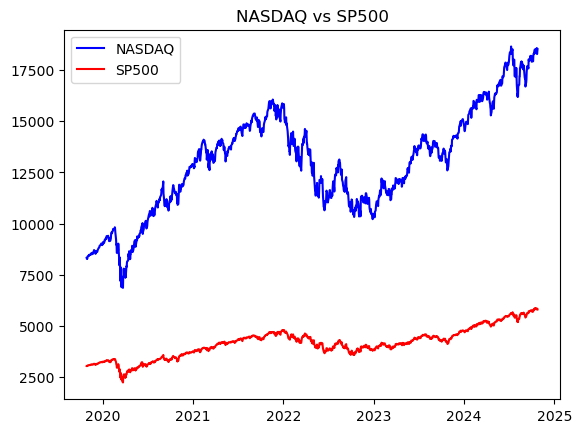

In [26]:
plt.plot(NASDAQ_Close,'b')  # b for "blue"
plt.plot(SP500_Close,'r')   # r for "red" 
plt.legend(['NASDAQ','SP500'])
plt.title('NASDAQ vs SP500')

plt.show()

### Q2.2, Normalize the values and plot these two stocks' Close/Last price in one chart again with proper legend and title. (5 pts)
Hint: **Normalize** means all values divided by their initial value

In [28]:
NASDAQ_Close.head(1)
NASDAQ_Close.tail(1)

Date
2024-10-25    18518.61
Name: Close/Last, dtype: float64

Date
2019-10-28    8325.99
Name: Close/Last, dtype: float64

In [29]:
SP500_Close.head(1)
SP500_Close.tail(1)

Date
2024-10-25    5808.12
Name: Close/Last, dtype: float64

Date
2019-10-28    3039.42
Name: Close/Last, dtype: float64

#### From the above data set, the **initial** value is at the last row position .iloc[-1]

In [31]:
NASDAQ_Close / NASDAQ_Close.iloc[-1]

Date
2024-10-25    2.224193
2024-10-24    2.211808
2024-10-23    2.195132
2024-10-22    2.230741
2024-10-21    2.226762
                ...   
2019-11-01    1.007256
2019-10-31    0.995961
2019-10-30    0.997356
2019-10-29    0.994098
2019-10-28    1.000000
Name: Close/Last, Length: 1258, dtype: float64

In [32]:
SP500_Close / SP500_Close.iloc[-1]

Date
2024-10-25    1.910930
2024-10-24    1.911503
2024-10-23    1.907410
2024-10-22    1.925104
2024-10-21    1.926019
                ...   
2019-11-01    1.009044
2019-10-31    0.999388
2019-10-30    1.002418
2019-10-29    0.999168
2019-10-28    1.000000
Name: Close/Last, Length: 1258, dtype: float64

Text(0.5, 1.0, 'Normalized NASDAQ vs SP500')

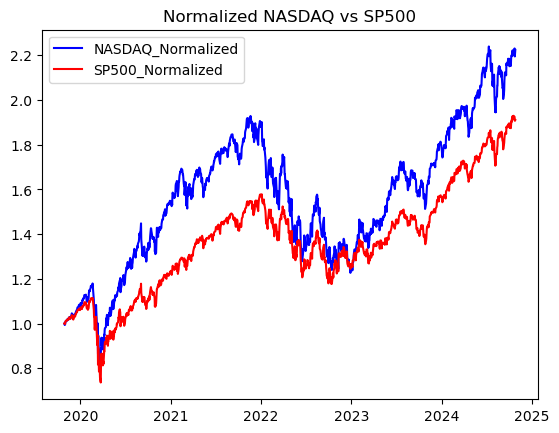

In [33]:
plt.plot(NASDAQ_Close / NASDAQ_Close.iloc[-1],'b')  # b for "blue"
plt.plot(SP500_Close / SP500_Close.iloc[-1],'r')   # r for "red" 
plt.legend(['NASDAQ_Normalized','SP500_Normalized'])
plt.title('Normalized NASDAQ vs SP500')

plt.show()

## Q3, Investment Strategies

### 3.1, Consider only the NASDAQ Stock, with this investment strategy: buy whenever the price goes above the 30-day moving average, and then sell after 10 trading sessions. How much profit ratio would we make on average? (5 pts)
Hint: The initial value is the close price at the oldest date 

In [37]:
#pd.set_option('display.min_rows', 70)
#pd.set_option('display.max_rows', 70)

Need to sort the series with initial date at front, latest date at end.

In [39]:
NASDAQ_Close_index_sorted = NASDAQ_Close.sort_index()
NASDAQ_Close_index_sorted.head(11)

Date
2019-10-28    8325.99
2019-10-29    8276.85
2019-10-30    8303.98
2019-10-31    8292.36
2019-11-01    8386.40
2019-11-04    8433.20
2019-11-05    8434.68
2019-11-06    8410.63
2019-11-07    8434.52
2019-11-08    8475.31
2019-11-11    8464.28
Name: Close/Last, dtype: float64

Get the selling price by .shift(-10)

In [41]:
NASDAQ_Close_index_sorted.shift(-10).head(1)

Date
2019-10-28    8464.28
Name: Close/Last, dtype: float64

In [42]:
movavg = NASDAQ_Close_index_sorted.rolling(30).mean()

In [43]:
profit = (NASDAQ_Close_index_sorted.shift(-10) - NASDAQ_Close_index_sorted) / NASDAQ_Close_index_sorted

In [44]:
profit_ratio = profit[NASDAQ_Close_index_sorted > movavg].mean() 
profit_ratio

0.007271232242890075

### Q3.2, Use above question's profit ratio(no hard-coding). If we use $1000 to start with this investiment strategy, what will be the end profit in dollar amount ? (5 pts)

In [46]:
trading_days = (NASDAQ_Close_index_sorted > movavg).sum()
trading_days

810

In [47]:
1000 * trading_days * profit_ratio

5889.698116740961

# Now let's work on the 2nd data set, Boston police intervention records.

In [49]:
df = pd.read_csv('Intervention-v1.csv',index_col='DATE')
df.index = df.index.astype('datetime64[s]')

In [50]:
df.head()

,CITY,REASONS,SUBJECT_AGE,SUBJECT_VEHICLE,SUBJECT_GENDER,SUBJECT_ETHNICITY,SUBJECT_CLOTHING,OFFICER_ID
DATE,,,,,,,,
2013-12-10,NaN,"DRUGS, INVESTIGATION",59,NISSAN,MALE,B(Black),"blk jacket, blk shirt, blue jeans, wht sneakers",98656
2012-05-24,OTHER,"DRUGS, POSSESSION",26,NO DATA ENTERED,MALE,W(White),"GRY. SWEATSHIRT, BLUE JEANS",9765
2012-06-04,NaN,"INVESTIGATE, PERSON",18,NO DATA ENTERED,MALE,B(Black),"GRY SWEATSHIRT, GRY PANTS",83575
2014-06-21,Dorchester,ABDW,24,NO DATA ENTERED,MALE,B(Black),"lime green shirt, blue jeans",76146
2010-12-02,Dorchester,VAL,70,SATURN,MALE,B(Black),BLU DOWN VEST BLU PANTS,107106


## Data Description

The data set reports information on police interventions near Boston (one intervention per row). During an intervention, a police officer (identified by an OFFICER_ID), records information on a subject suspected to be violating the law.

#### Columns:
<ul>
<li><b>DATE</b>: the date of the intervention
<li><b>CITY</b>: the city where the intervention occurred
<li><b>REASONS</b>: a comma-separated list of reasons why the officer intervened
<li><b>SUBJECT_AGE</b>: the age of the subject suspected to be violating the law
<li><b>SUBJECT_VEHICLE</b>: the subject's vehicle's car maker
<li><b>SUBJECT_GENDER</b>: the subject's gender
<li><b>SUBJECT_ETHNICITY</b>: the subject's ethnicity
<li><b>SUBJECT_CLOTHING</b>: a comma-separated list of clothes worn by the subject
<li><b>OFFICER_ID</b>: the id of the officer performing the intevention
</ul>

## Question 4 - General Investigation

### 4.1, How many interventions in this dats set? And how many interventions occurred in 'South Boston'? (4 pts)

In [55]:
len(df)

50000

In [56]:
len(df[df.CITY=='South Boston'])

1126

### 4.2, How many different police officer in this data set ? (4 pts)

In [58]:
len(df.OFFICER_ID.unique())

1443

or..

In [60]:
df.OFFICER_ID.nunique()

1443

### 4.3, What's the top 5 cities which has the highest interventions? Show the city name and their interventions count in descending order. (4 pts)

In [62]:
df.groupby('CITY')['CITY'].count().nlargest()

CITY
Dorchester     6487
Boston         5766
OTHER          4914
Roxbury        2783
East Boston    1195
Name: CITY, dtype: int64

## Question 5, General Investigation - cont.

### 5.1, Which column has the most Nan in it and how many Nan ? (4 pts)

In [65]:
df.isna().sum().nlargest(1)

CITY    22880
dtype: int64

### 5.2, There are some rows has incorrect date entry(the DATEs are in the future compare to today's date '2024-10-31'. How many rows has this type of error? (4 pts)

In [67]:
len(df[df.index > '2024-10-31'])

6

### 5.3, There are some rows' *SUBJECT_AGE* entry with age = -1 . How many rows has this type of error? replace those '-1' with '0' then report the total number of rows with *SUBJECT_AGE* = 0. (4 pts)

In [69]:
(df.SUBJECT_AGE == -1).sum()

1308

In [70]:
(df.SUBJECT_AGE==0).sum()

56

In [71]:
df.replace({'SUBJECT_AGE': {-1:0} }, inplace=True)

In [72]:
(df.SUBJECT_AGE==0).sum()

1364

## Question 6, ETHNICITY Investigation

### 6.1, For each *SUBJECT_ETHNICITY*, what the total interventions number? Show the ethnicity and their total intervention numbers in decending order. (5 pts)

In [75]:
df.groupby('SUBJECT_ETHNICITY').size().sort_values(ascending=False)

SUBJECT_ETHNICITY
B(Black)                                29367
W(White)                                11237
H(Hispanic)                              6597
NO DATA ENTERED                          2002
A(Asian or Pacific Islander)              393
UNKNOWN                                   217
M(Middle Eastern or East Indian)          162
I(American Indian or Alaskan Native)       25
dtype: int64

### 6.2, What *SUBJECT_ETHNICITY* has the highest average *SUBJECT_AGE*? Report the ethnicity and its aveage age. (5 pts)

In [77]:
df.groupby('SUBJECT_ETHNICITY')['SUBJECT_AGE'].mean().nlargest(1)

SUBJECT_ETHNICITY
W(White)    32.192845
Name: SUBJECT_AGE, dtype: float64

## Question 7, Intervention Reasons

### 7.1, What's the top 5 reasons for police interventions ? (5 pts)

In [80]:
df.groupby('REASONS').size().nlargest()

REASONS
INVESTIGATE, PERSON     30872
VAL                      7057
TRESPASSING              1540
DRUGS, INVESTIGATION     1227
INVESTIGATE, MV          1120
dtype: int64

### 7.2, What is the proportion of interventions whose *REASONS* include FIREARM or DRUGS? You must only return one number between 0 and 1. Do not round it. (5 pts)

In [82]:
df.REASONS.apply(lambda x: True if 'FIREARM' in x \
                                 or 'DRUGS' in x \
                                 else False).mean()

0.04458

or ..

In [84]:
(df.REASONS.str.contains('FIREARM') | df.REASONS.str.contains('DRUGS')).mean()

0.04458

## Question 8, Gender and Age Investigation

### Q8.1, Based on *SUBJECT_GENDER*,  consider only *SUBJECT_AGE* between 15 to 100(both 15 and 100 are included).Show each group's average age in one table(5 pts). 

In [87]:
df_15_100= df[(df.SUBJECT_AGE >= 15) & (df.SUBJECT_AGE <= 100)]

In [88]:
df_15_100.groupby('SUBJECT_GENDER')['SUBJECT_AGE'].mean()

SUBJECT_GENDER
FEMALE     30.832264
MALE       28.843986
UNKNOWN    33.843373
Name: SUBJECT_AGE, dtype: float64

### Q8.2, Based on above queston, Show each group's age maximum, minimum and the gap between max and min(call that gap 'age_spread') in one table. (5 pts)

In [90]:
df_15_100.groupby('SUBJECT_GENDER')['SUBJECT_AGE'].\
        agg({'max','min',lambda x: x.max()-x.min()}).\
                rename(columns={'<lambda_0>':'age_spread'})

,min,age_spread,max
SUBJECT_GENDER,,,
FEMALE,15,69,84
MALE,15,82,97
UNKNOWN,15,54,69


## Question 9, Vehicle Investigation

### For each OFFICER_ID, find the number of interventions whose SUBJECT_VEHICLE is a HONDA or a BMW. Call these columns N_HONDA and N_BMW, respectively. Display the result table's first 5 rows based on N_HONDA in descending order. (10 pts)

In [93]:
df['N_HONDA'] = df.SUBJECT_VEHICLE=='HONDA'

In [94]:
df['N_BMW'] = df.SUBJECT_VEHICLE=='BMW'

In [95]:
df.groupby('OFFICER_ID').agg({'N_HONDA':'sum','N_BMW':'sum'}).head()

,N_HONDA,N_BMW
OFFICER_ID,,
1,8,2
2,0,0
1070,0,1
1113,0,0
1144,0,0


In [96]:
df.groupby('OFFICER_ID').agg({'N_HONDA':'sum','N_BMW':'sum'}).\
            sort_values(by='N_HONDA',ascending=False)[:5]

,N_HONDA,N_BMW
OFFICER_ID,,
92675,52,4
83575,44,4
91908,39,5
107106,35,5
55238,35,1
